# <font color='blue'>Telecom Churn Case Study</font>
* Institution: IIIT, Bangalore and UpGrad
* Course: PG Diploma in Machine Lerning and AI March 2018
* Date: 14-Aug-2018
* Submitted by:
    1. Pandinath Siddineni (ID- APFE187000194)
    2. AKNR Chandra Sekhar (ID- APFE187000315)
    3. Brajesh Kumar       (ID- APFE187000149)
    4. Shweta Tiwari
-----------------------------------

# <font color='blue'>PART 3: FEATURE REDUCTION USING PCA</font>

In [1]:
import os.path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
pd.options.display.float_format = '{:.2f}'.format

In [108]:
# Load clean telecom data file
master_df = pd.read_csv('E:\IIIT Bangalore AIML\Group Assignment 2\\telecom_churn_data_clean2.csv', low_memory=False)

In [109]:
master_df.head()

,mobile_number,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,...,rech_days_left_data_7,rech_days_left_8,rech_days_left_data_8,churn,night_pck_churn_6,night_pck_churn_7,night_pck_churn_8,fb_churn_6,fb_churn_7,fb_churn_8
0,7000701601,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,...,0.00,5.00,0.00,1,0.07,0.08,0.09,0.07,0.08,0.09
1,7002311591,288.56,376.66,111.61,186.59,1326.06,771.14,52.96,0.00,7.28,...,0.00,6.00,0.00,1,0.07,0.08,0.09,0.07,0.08,0.09
2,7000959346,120.19,236.14,1.71,2082.18,2532.03,408.54,0.00,0.00,0.00,...,0.00,3.00,0.00,1,0.07,0.08,0.09,0.07,0.08,0.09
3,7000104470,1241.99,1026.66,0.00,112.91,115.13,0.00,0.00,0.00,0.38,...,0.00,2.00,0.00,1,0.07,0.08,0.09,0.07,0.08,0.09
4,7000409785,424.98,328.73,363.98,457.09,361.34,391.68,315.29,303.04,254.34,...,0.00,1.00,0.00,1,0.07,0.08,0.09,0.07,0.08,0.09


In [110]:
list(master_df)

['mobile_number',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'loc_ic_t2t_mou_6',
 'lo

In [111]:
master_df.shape

(28504, 144)

In [149]:
telecom = master_df.drop(['mobile_number'], 1)
#telecom = telecom.drop(['fb_user_6', 'fb_user_7', 'fb_user_8', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8'], 1)
telecom = telecom.drop(['fb_churn_6', 'fb_churn_7', 'fb_churn_8', 'night_pck_churn_6', 'night_pck_churn_7', 'night_pck_churn_8'], 1)


In [150]:
telecom.head()

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,...,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,rech_days_left_6,rech_days_left_data_6,rech_days_left_7,rech_days_left_data_7,rech_days_left_8,rech_days_left_data_8,churn
0,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,...,0.00,0.00,0.00,3.00,0.00,6.00,0.00,5.00,0.00,1
1,288.56,376.66,111.61,186.59,1326.06,771.14,52.96,0.00,7.28,10.69,...,0.00,0.00,0.00,0.00,0.00,4.00,0.00,6.00,0.00,1
2,120.19,236.14,1.71,2082.18,2532.03,408.54,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,0.00,1
3,1241.99,1026.66,0.00,112.91,115.13,0.00,0.00,0.00,0.38,0.00,...,0.00,0.00,0.00,1.00,0.00,2.00,0.00,2.00,0.00,1
4,424.98,328.73,363.98,457.09,361.34,391.68,315.29,303.04,254.34,613.84,...,0.00,0.00,0.00,2.00,0.00,1.00,0.00,1.00,0.00,1


# applying SMOTE

In [114]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
X = telecom.drop(['churn'],axis=1)
y = telecom['churn']
sm = SMOTE(kind = "regular")
X_tr,y_tr = sm.fit_sample(X,y)
print(X_tr.shape)
print(y_tr.shape)
np.count_nonzero(y_tr)


(53816, 136)
(53816,)


26908

In [134]:
X_tr = X
y_tr = y

In [151]:
X_train, X_test, y_train, y_test = train_test_split(X_tr,y_tr, train_size=0.7,random_state=42)

E:\Users\Aknrcsekhar\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [152]:
X_train

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,...,aon,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,rech_days_left_6,rech_days_left_data_6,rech_days_left_7,rech_days_left_data_7,rech_days_left_8,rech_days_left_data_8
11465,125.09,81.18,58.99,11.28,6.44,16.88,0.00,0.00,0.00,0.00,...,2845,580.00,252.00,145.00,2.00,2.00,6.00,6.00,9.00,9.00
21150,19.33,85.69,55.01,1002.11,1301.99,1378.78,387.41,0.00,0.00,105.79,...,2867,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
2498,4.21,3.68,0.00,15.66,7.84,11.86,0.00,0.00,0.00,0.00,...,384,0.00,2496.00,856.00,13.00,0.00,2.00,2.00,7.00,14.00
13702,58.33,82.51,50.18,354.54,351.79,252.21,3.03,0.00,0.00,6.85,...,1122,368.00,368.00,154.00,1.00,1.00,4.00,6.00,0.00,17.00
20184,65.14,76.81,45.06,483.84,546.34,258.24,0.66,9.05,0.00,2.60,...,3098,0.00,0.00,0.00,3.00,0.00,6.00,0.00,10.00,0.00
5502,80.64,272.33,462.04,259.03,372.08,124.06,0.00,0.00,0.00,0.00,...,572,225.00,1225.00,1225.00,0.00,2.00,2.00,5.00,4.00,4.00
10325,0.80,3.58,2.96,8.84,3.86,1.83,0.00,0.00,0.00,0.00,...,793,252.00,252.00,252.00,13.00,13.00,7.00,17.00,21.00,21.00
5995,148.86,7.86,3.19,13.28,37.01,8.03,0.00,0.00,0.00,0.00,...,278,666.00,1036.00,768.00,11.00,11.00,11.00,16.00,13.00,13.00
6228,426.48,442.51,482.33,862.38,1072.79,868.76,0.00,0.00,0.00,0.00,...,2576,1008.00,252.00,252.00,2.00,2.00,0.00,12.00,7.00,21.00
23573,59.68,88.46,75.69,458.89,407.53,231.89,0.00,0.00,0.00,0.00,...,3651,0.00,0.00,0.00,5.00,0.00,13.00,0.00,3.00,0.00


In [154]:
from sklearn import preprocessing
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X_train)
x_scaled = scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
X_train=scaler.transform(X_train)

In [155]:
X_train

array([[-0.30672382, -0.4074391 , -0.40038142, ...,  0.0535099 ,
         0.97497267,  0.39784624],
       [-0.54353344, -0.39793704, -0.40891035, ..., -0.69702047,
        -0.60936164, -0.69354754],
       [-0.57738897, -0.57072291, -0.52679384, ..., -0.44684368,
         0.57888909,  1.00417612],
       ...,
       [-0.58014309,  0.26640684, -0.31359208, ..., -0.69702047,
         0.18280551, -0.69354754],
       [-0.03294629, -0.52097929, -0.20425895, ..., -0.69702047,
        -0.60936164, -0.57228156],
       [-0.54297366, -0.51173005, -0.46276259, ..., -0.69702047,
        -0.80740343, -0.69354754]])

In [156]:
X_test

array([[-0.48854058, -0.51324701, -0.46473411, ...,  1.05421706,
        -0.80740343, -0.08721766],
       [ 0.69481336,  0.22100341,  0.01342157, ..., -0.69702047,
         0.77693088, -0.69354754],
       [ 0.08904111,  0.2495096 ,  0.22411608, ..., -0.69702047,
        -0.21327806, -0.69354754],
       ...,
       [ 1.37517079,  2.0773823 ,  1.85142686, ..., -0.69702047,
         1.17301446, -0.69354754],
       [-0.31216489, -0.52978608, -0.42733969, ..., -0.69702047,
        -0.60936164, -0.69354754],
       [ 1.70669529, -0.42764415,  0.44070369, ..., -0.69702047,
        -0.80740343, -0.69354754]])

# applying SVM kernel

from sklearn.svm import SVC
model = SVC(C = 1, kernel='rbf')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# confusion matrix
confusion_matrix(y_true=y_test, y_pred=y_pred)

In [32]:

# Printing classification report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.94      1.00      0.97      8074
          1       0.00      0.00      0.00       478

avg / total       0.89      0.94      0.92      8552



C:\Users\bkumar5\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# applying decision tree

In [140]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [141]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred_default = dt_default.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred_default))

print(y_pred_default)
print(y_test)


             precision    recall  f1-score   support

          0       0.96      0.99      0.98      8092
          1       0.62      0.33      0.43       460

avg / total       0.94      0.95      0.95      8552

[0 0 0 ... 0 0 0]
11701    0
26714    0
20293    0
1433     1
25489    0
17038    0
15091    0
11021    0
4178     0
15565    0
28393    0
27385    0
15622    0
4084     0
5658     0
19598    0
26140    0
866      1
17769    0
23005    0
24108    0
8005     0
18393    0
3426     0
26436    0
4416     0
21183    0
2129     0
25831    0
22616    0
        ..
18197    0
7658     0
27080    0
8018     0
7290     0
23971    0
1348     1
3264     0
17935    0
24877    0
6161     0
28409    0
3388     0
3310     0
25617    0
21314    0
18475    0
14655    0
18429    0
6883     0
23716    0
12848    0
24012    0
5709     0
23638    0
22529    0
20553    0
21418    0
24770    0
28157    0
Name: churn, Length: 8552, dtype: int64


# feature extraction using lasso

In [157]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
 
lsvc = LinearSVC(C=0.02, penalty="l1", dual=False).fit(X_train,y_train)
model = SelectFromModel(lsvc, prefit=True)
X_train_transformed = model.transform(X_train)
pos = model.get_support(indices=True)
 
print(X_train_transformed.shape)
print(pos)
 
X_test_transformed = model.transform(X_test)
print(X_test_transformed.shape) 


(19952, 73)
[  0   1   5   6   7   8   9  10  11  15  20  21  23  30  31  34  36  38
  39  42  43  44  46  47  49  50  54  55  58  61  62  63  65  71  75  76
  77  78  80  81  83  87  88  89  90  91  92  93  94  95  97  98  99 100
 101 102 103 104 106 107 108 111 112 113 114 120 121 125 126 130 132 134
 135]
(8552, 73)


In [158]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
X = X_train_transformed  #telecom.drop(['churn'],axis=1)
y = y_train  #telecom['churn']
sm = SMOTE(kind = "regular")
X_tr,y_tr = sm.fit_sample(X,y)
print(X_tr.shape)
print(y_tr.shape)
np.count_nonzero(y_tr)


(37632, 73)
(37632,)


18816

# applying linear SVC after lasso

model = SVC(C = 1)
model.fit(X_train_transformed, y_train)
y_pred = model.predict(X_test_transformed)
confusion_matrix(y_true=y_test, y_pred=y_pred)

# applying default random forest after lasso

In [159]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [160]:
# fit
#rfc.fit(X_train_transformed,y_train)
rfc.fit(X_tr,y_tr)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [161]:
# Making predictions
predictions = rfc.predict(X_test_transformed)

In [162]:
# Let's check the report of our default model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.97      0.97      0.97      8092
          1       0.44      0.47      0.45       460

avg / total       0.94      0.94      0.94      8552



In [163]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions))

[[7819  273]
 [ 246  214]]


In [164]:
print(accuracy_score(y_test,predictions))

0.9393124415341441


In [61]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train_transformed, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': range(2, 20, 5)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring='accuracy', verbose=0)

In [62]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_max_depth,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.48,0.02,1.00,1.00,2,{'max_depth': 2},4,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,0.05,0.00,0.00,0.00
1,0.67,0.02,1.00,1.00,7,{'max_depth': 7},1,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,0.07,0.01,0.00,0.00
2,0.63,0.02,1.00,1.00,12,{'max_depth': 12},1,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,0.10,0.00,0.00,0.00
3,0.67,0.02,1.00,1.00,17,{'max_depth': 17},1,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,0.03,0.00,0.00,0.00


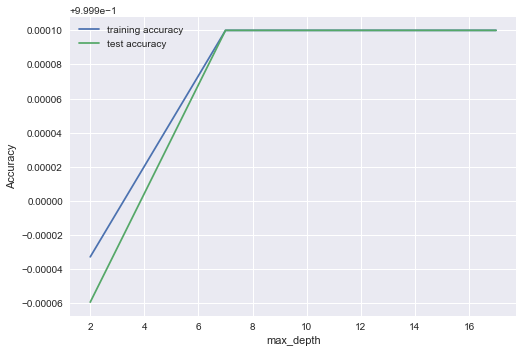

In [63]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [64]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 400)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=7)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train_transformed, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': range(100, 1500, 400)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [65]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_n_estimators,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,6.16,0.11,1.00,1.00,100,{'n_estimators': 100},1,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,0.28,0.00,0.00,0.00
1,20.62,0.31,1.00,1.00,500,{'n_estimators': 500},1,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,5.67,0.09,0.00,0.00
2,29.97,0.47,1.00,1.00,900,{'n_estimators': 900},1,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,0.66,0.01,0.00,0.00
3,43.40,0.70,1.00,1.00,1300,{'n_estimators': 1300},1,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,0.52,0.04,0.00,0.00


In [ ]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
# GridSearchCV to find optimal max_features
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24]}

# instantiate the model
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train_transformed, y_train)

In [ ]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

In [ ]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train_transformed, y_train)

In [ ]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

In [ ]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

In [ ]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

In [ ]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [ ]:
# Fit the grid search to the data
grid_search.fit(X_train_transformed, y_train)

In [ ]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

In [ ]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=10,
                             n_estimators=100)

In [ ]:
# fit
rfc.fit(X_train_transformed,y_train)

In [ ]:
# predict
predictions = rfc.predict(X_test_transformed)

In [ ]:
# evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(y_test,predictions))

In [ ]:
print(confusion_matrix(y_test,predictions))

# applying decision tree

In [21]:
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(X_train_transformed, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [23]:
y_pred_default = dt_default.predict(X_test_transformed)

# Printing classification report
print(classification_report(y_test, y_pred_default))

             precision    recall  f1-score   support

          0       0.95      0.99      0.97      8128
          1       0.59      0.26      0.36       531

avg / total       0.93      0.94      0.93      8659

